# Figure A

`summarise()` has grouped output by 'time_point', 'ad_category'. You can
override using the `.groups` argument.


# A tibble: 27 × 5
# Groups:   time_point, ad_category [9]
   time_point ad_category Treatment_Information mean_ADAS se_ADAS
        <int> <fct>       <chr>                     <dbl>   <dbl>
 1          1 Slow        LY3314814-20mg             27.4   0.746
 2         52 Slow        LY3314814-20mg             30.4   0.974
 3        104 Slow        LY3314814-20mg             36.0   2.66 
 4          1 Slow        LY3314814-50mg             26.6   0.653
 5         52 Slow        LY3314814-50mg             29.7   0.929
 6        104 Slow        LY3314814-50mg             31.6   1.69 
 7          1 Slow        Placebo                    26.1   0.664
 8         52 Slow        Placebo                    28.4   0.861
 9        104 Slow        Placebo                    34.1   2.07 
10          1 Rapid       LY3314814-20mg             29.5   0.416
# ℹ 17 more rows


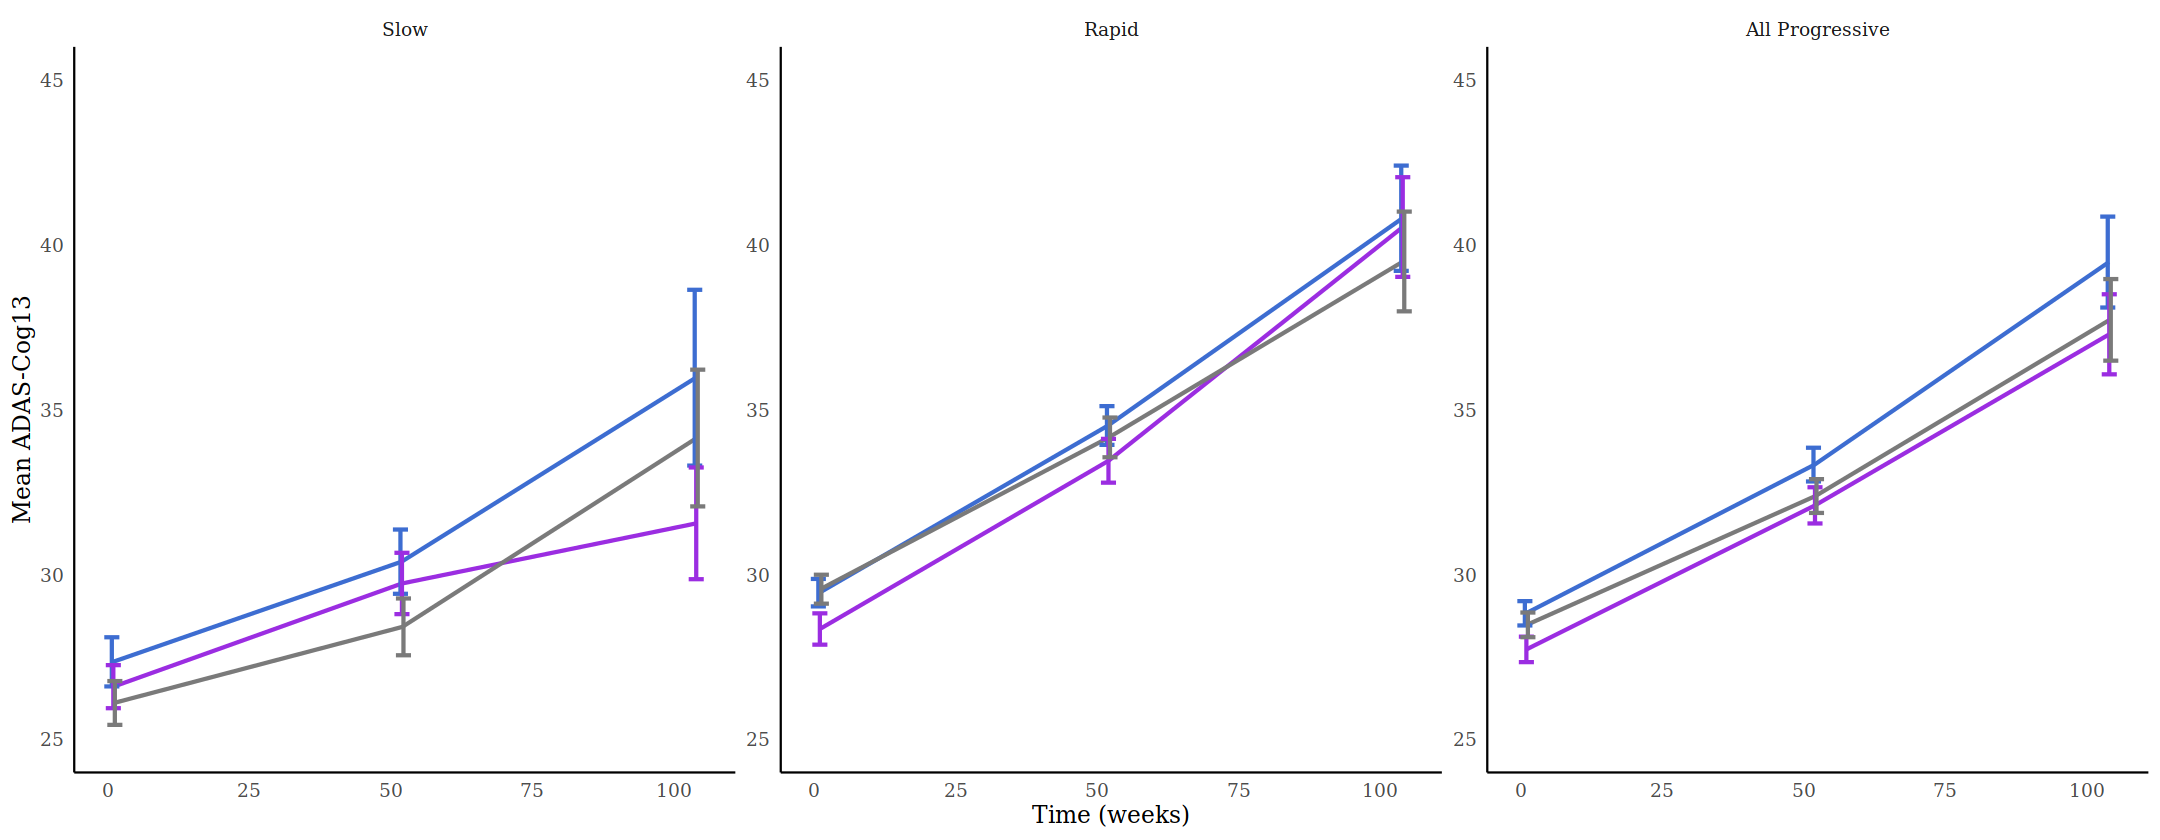

In [10]:

# Load necessary libraries
library(ggplot2)
library(dplyr)
library(patchwork)

# Ensure consistent plot size
options(repr.plot.width = 18, repr.plot.height = 7)

# Load Data
new_table_ad_filtered <- read.csv("data/new_table_adas_withCov.csv") 

# Calculate changes over time: week 104 - week 1

# ADAS CHANGE
# Filter rows with time_point=1 and time_point=104
adas_1 <- subset(new_table_ad_filtered, time_point == 1)
adas_104 <- subset(new_table_ad_filtered, time_point == 104)

# Merge the two subsets based on the EID column
adas_change <- merge(adas_1, adas_104, by = "EID", suffixes = c("_1", "_104"))

# Calculate the change in ADAS
adas_change$ADAS_change <- adas_change$ADAS_104 - adas_change$ADAS_1

# Selecting specific columns
selected_columns <- c("EID", "Treatment_Information_1", "ad_category_1", "ADAS_change")

# Subset the data with selected columns
adas_change_subset <- adas_change[, selected_columns]

# Plot ADAS-Cog13 (main figure) and save figure and related table

# Combine "Slow" and "Rapid" into "All Progressive" and filter out "Stable" category
new_table_ad_filtered_all <- new_table_ad_filtered %>%
  filter(ad_category != "Stable") %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid"))) %>%
  bind_rows(new_table_ad_filtered %>%
              filter(ad_category != "Stable") %>%
              mutate(ad_category = "All Progressive")) %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid", "All Progressive")))

# Plot for Study with three subplots for AD categories using facet_wrap
p <- ggplot(new_table_ad_filtered_all, aes(x = time_point, y = ADAS, group = Treatment_Information, color = Treatment_Information)) +
  stat_summary(fun = "mean", geom = "line", position = position_dodge(width = 0.2), size = 1.2) +
  stat_summary(fun.data = "mean_se", geom = "errorbar", position = position_dodge(width = 0.8), width = 8, size = 1.2) +
  facet_wrap(~ ad_category, scales = "free", nrow = 1) +  # Create separate plots for each ad_category
  labs(x = "Time (weeks)",  # Change x-axis label
       y = "Mean ADAS-Cog13") +
  theme_minimal(base_family = "serif", base_size = 14) +
  coord_cartesian(ylim = c(25, 45)) +
  scale_y_continuous(breaks = seq(25, 45, by = 5)) +  # Adding more tick marks on y-axis
  scale_color_manual(values = c("Placebo" = "#7a7a7aff",  # Medium dark gray for Placebo
                                "LY3314814-20mg" = "#3d6dd1ff", "LY3314814-50mg" = "#9b2de1ff",  # Different blue shades for Slow progression
                                "LY3314814-20mg" = "#3d6dd1ff", "LY3314814-50mg" = "#9b2de1ff")) +  # Adjust colors as needed
  theme(panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        axis.line.x = element_line(color = "black"),
        axis.line.y = element_line(color = "black"),
        legend.position = "none")

# Print the plot
print(p)

# # Save the plot as EPS file
output_path_plot <- "figures/adas_plot.eps"
ggsave(output_path_plot, plot = p, device = "eps", width = 14, height = 7, family = "serif")

# Calculate means and standard errors
summary_table <- new_table_ad_filtered_all %>%
  group_by(time_point, ad_category, Treatment_Information) %>%
  summarise(
    mean_ADAS = mean(ADAS, na.rm = TRUE),
    se_ADAS = sd(ADAS, na.rm = TRUE) / sqrt(n())
  ) %>%
  arrange(ad_category, Treatment_Information, time_point)

# Save summary table as CSV
output_path_table <- "figures/ADAS_summary_table.csv"
write.csv(summary_table, file = output_path_table, row.names = FALSE)

# Print the summary table
print(summary_table)


# Figure B

,EID,Treatment_Information_1,ad_category_1,ADAS_change
,<chr>,<chr>,<chr>,<int>
1,E0301003,LY3314814-20mg,Slow,4
2,E0301013,Placebo,Rapid,9
3,E0303002,LY3314814-20mg,Slow,-1
4,E0303012,LY3314814-20mg,Rapid,10
5,E0304003,LY3314814-20mg,Slow,9
6,E0304006,LY3314814-20mg,Slow,19


ADAS-Cog13
  Ad_Category Placebo_Difference Placebo_SE X20mg_Difference X20mg_SE
1        Slow           8.033901   2.072223         8.616314 2.664826
2       Rapid           9.937983   1.511948        11.354118 1.596143
3      Entire           8.985942   1.237557         9.985216 1.378098
  X50mg_Difference X50mg_SE
1         4.952632 1.694144
2        12.187998 1.511651
3         8.570315 1.214135


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


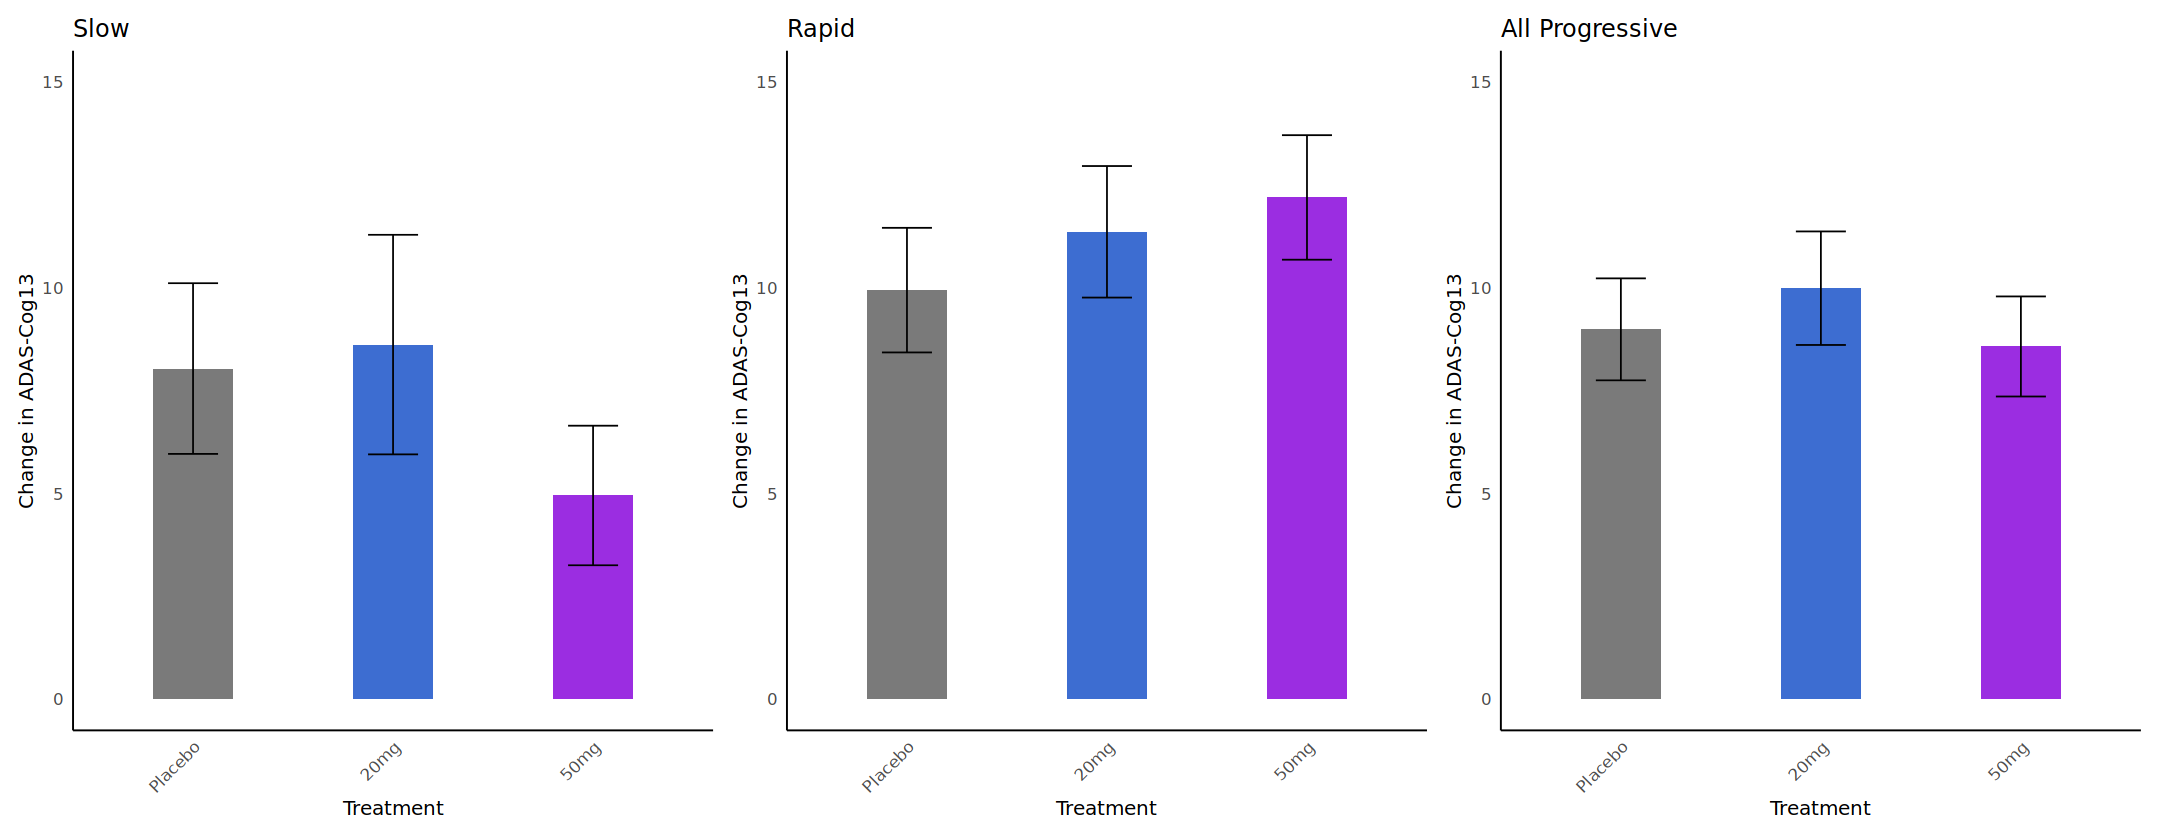

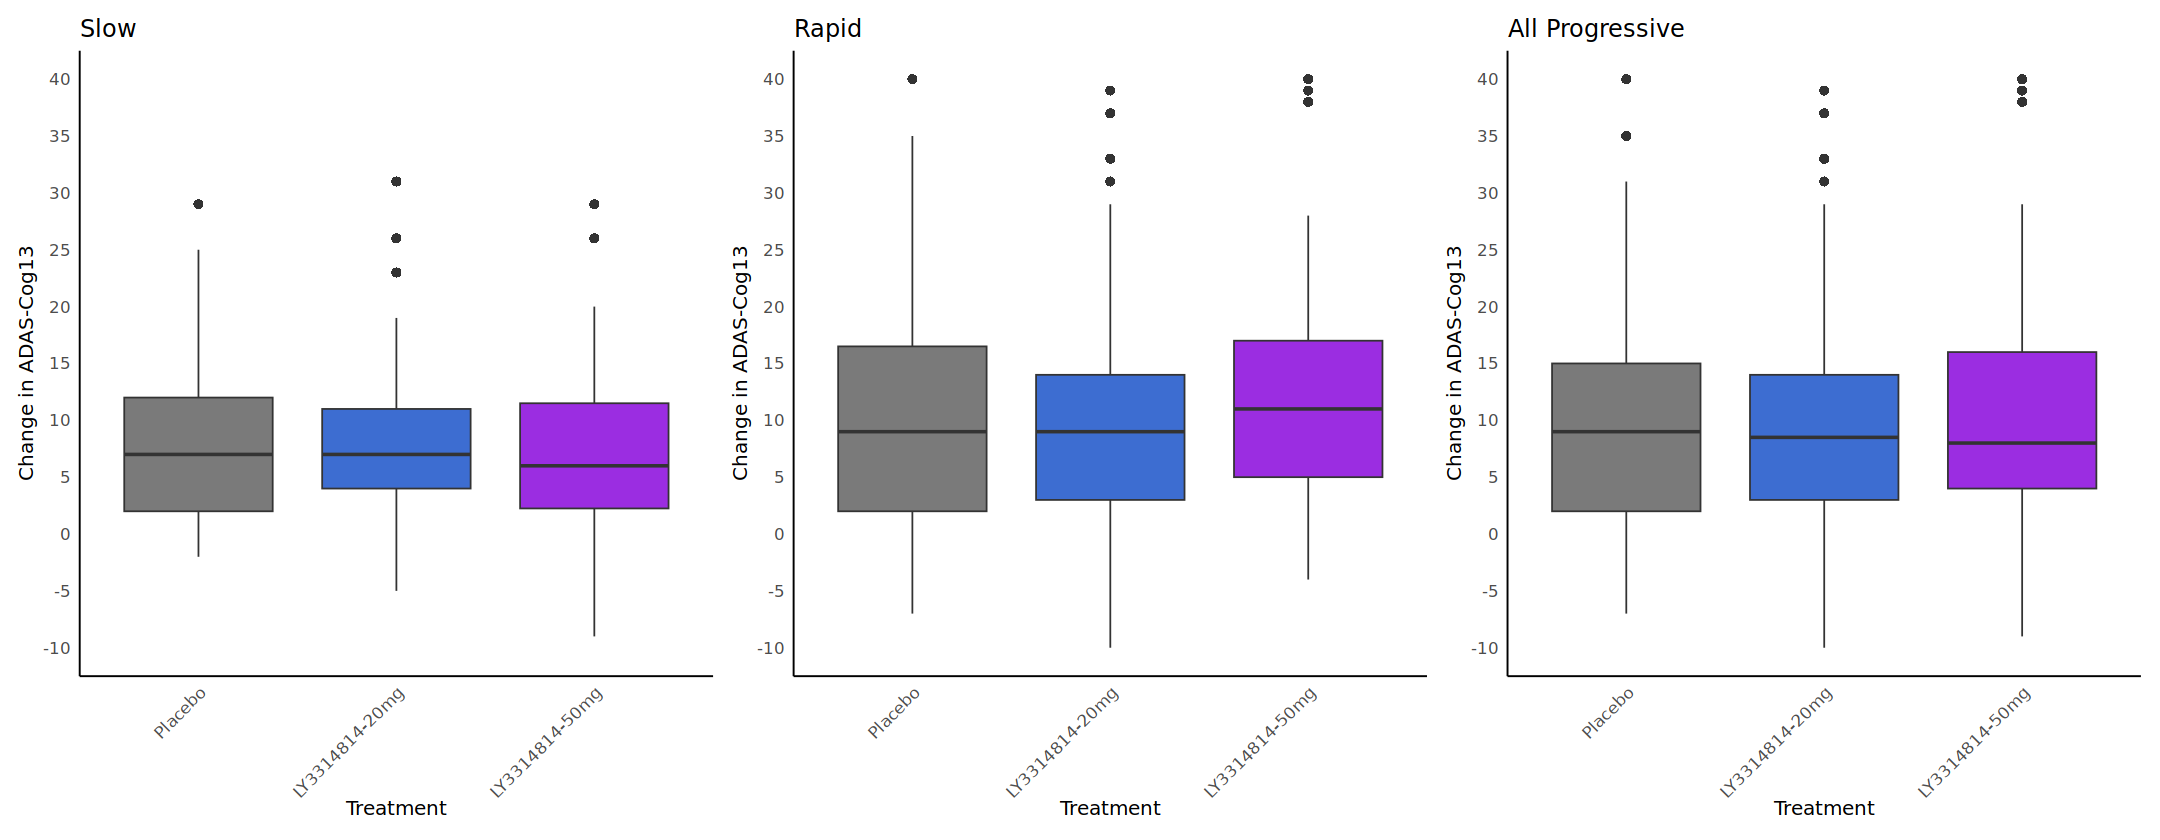

In [12]:
# Load required packages
library(dplyr)
library(ggplot2)
library(patchwork)

# Ensure consistent plot size
options(repr.plot.width = 18, repr.plot.height = 7)

# Load Data
new_table_ad_filtered <- read.csv("data/new_table_adas_withCov.csv")

# Calculate changes over time: week 104 - week 1
adas_1 <- subset(new_table_ad_filtered, time_point == 1)
adas_104 <- subset(new_table_ad_filtered, time_point == 104)

# Merge subsets and calculate ADAS change
adas_change <- merge(adas_1, adas_104, by = "EID", suffixes = c("_1", "_104"))
adas_change$ADAS_change <- adas_change$ADAS_104 - adas_change$ADAS_1

# Subset data with selected columns
selected_columns <- c("EID", "Treatment_Information_1", "ad_category_1", "ADAS_change")
adas_change_subset <- adas_change[, selected_columns]
head(adas_change_subset)

# Prepare data for change plots
new_data <- new_table_ad_filtered %>%
  mutate(ad_category = factor(ad_category, levels = c("Slow", "Rapid")))

# Function to calculate mean values, differences, and standard errors
calculate_means_differences <- function(data, treatment_name) {
  data_treatment <- subset(new_data, Treatment_Information == treatment_name)
  mean_data_treatment <- aggregate(ADAS ~ ad_category + time_point, data = data_treatment, FUN = mean)
  
  mean_rapid <- subset(mean_data_treatment, ad_category == "Rapid")
  mean_slow <- subset(mean_data_treatment, ad_category == "Slow")
  mean_entire <- aggregate(ADAS ~ time_point, data = mean_data_treatment, FUN = mean)
  
  diff_data <- data.frame(
    Ad_Category = c("Slow", "Rapid", "Entire"),
    Difference = c(
      mean_slow[mean_slow$time_point == 104, "ADAS"] - mean_slow[mean_slow$time_point == 1, "ADAS"],
      mean_rapid[mean_rapid$time_point == 104, "ADAS"] - mean_rapid[mean_rapid$time_point == 1, "ADAS"],
      mean_entire[mean_entire$time_point == 104, "ADAS"] - mean_entire[mean_entire$time_point == 1, "ADAS"]
    )
  )
  
  diff_data$SE <- c(
    data_treatment %>% filter(ad_category == "Slow" & time_point == 104) %>%
      summarise(SE = sd(as.numeric(ADAS), na.rm = TRUE) / sqrt(n())) %>% pull(SE),
    data_treatment %>% filter(ad_category == "Rapid" & time_point == 104) %>%
      summarise(SE = sd(as.numeric(ADAS), na.rm = TRUE) / sqrt(n())) %>% pull(SE),
    data_treatment %>% filter(time_point == 104) %>%
      summarise(SE = sd(as.numeric(ADAS), na.rm = TRUE) / sqrt(n())) %>% pull(SE)
  )
  
  return(diff_data)
}

# Perform calculations for each treatment group
diff_data_se_50mg <- calculate_means_differences(new_data, "LY3314814-50mg")
diff_data_se_20mg <- calculate_means_differences(new_data, "LY3314814-20mg")
diff_data_se_placebo <- calculate_means_differences(new_data, "Placebo")

# Combine data into a single data frame
combined_data <- data.frame(
  Ad_Category = diff_data_se_50mg$Ad_Category,
  Placebo_Difference = diff_data_se_placebo$Difference,
  Placebo_SE = diff_data_se_placebo$SE,
  `20mg_Difference` = diff_data_se_20mg$Difference,
  `20mg_SE` = diff_data_se_20mg$SE,
  `50mg_Difference` = diff_data_se_50mg$Difference,
  `50mg_SE` = diff_data_se_50mg$SE
)

cat("ADAS-Cog13\n")
print(combined_data)

# Provided data for ADAS-Cog13
combined_data_adas <- data.frame(
  Ad_Category = c("Slow", "Rapid", "All Progressive"),
  Placebo_Difference = c(8.033901, 9.937983, 8.985942),
  Placebo_SE = c(2.072223, 1.511948, 1.237557),
  X20mg_Difference = c(8.616314, 11.354118, 9.985216),
  X20mg_SE = c(2.664826, 1.596143, 1.378098),
  X50mg_Difference = c(4.952632, 12.187998, 8.570315),
  X50mg_SE = c(1.694144, 1.511651, 1.214135)
)

# Function to create a bar plot for a specific Ad_Category
plot_category <- function(category) {
  data_to_plot <- combined_data_adas[combined_data_adas$Ad_Category == category, ]
  plot_data <- data.frame(
    Treatment = factor(c("Placebo", "20mg", "50mg"), levels = c("Placebo", "20mg", "50mg")),
    Difference = c(data_to_plot$Placebo_Difference, data_to_plot$X20mg_Difference, data_to_plot$X50mg_Difference),
    SE = c(data_to_plot$Placebo_SE, data_to_plot$X20mg_SE, data_to_plot$X50mg_SE)
  )
  
  ggplot(plot_data, aes(x = Treatment, y = Difference, fill = Treatment)) +
    geom_bar(stat = "identity", position = "dodge", width = 0.4) +
    geom_errorbar(aes(ymin = Difference - SE, ymax = Difference + SE),
                  position = position_dodge(width = 0.9), width = 0.25) +
    labs(title = category, x = "Treatment", y = "Change in ADAS-Cog13") +
    theme_minimal(base_size = 12) +
    coord_cartesian(ylim = c(0, 15)) +
    scale_fill_manual(values = c("Placebo" = "#7a7a7aff", "20mg" = "#3d6dd1ff", "50mg" = "#9b2de1ff")) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_text(size = 12),
          axis.title.y = element_text(size = 12),
          axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
          axis.text.y = element_text(size = 10),
          axis.line = element_line(color = "black"),
          legend.position = "none")
}

# Generate and save plots
plot_slow <- plot_category("Slow")
plot_rapid <- plot_category("Rapid")
plot_entire <- plot_category("All Progressive")
combined_plot <- plot_slow + plot_rapid + plot_entire + plot_layout(ncol = 3)

ggsave("figures/change_bar_adas_plot.eps", plot = combined_plot, device = "eps", width = 14, height = 7, family = "serif")
print(combined_plot)

# Function to create box plots
plot_category_boxplot <- function(data, ad_category) {
  data_to_plot <- na.omit(unique(data[data$ad_category_1 == ad_category, ]))
  data_to_plot$Treatment_Information_1 <- factor(
    data_to_plot$Treatment_Information_1,
    levels = c("Placebo", "LY3314814-20mg", "LY3314814-50mg")
  )
  
  ggplot(data_to_plot, aes(x = Treatment_Information_1, y = ADAS_change, fill = Treatment_Information_1)) +
    geom_boxplot(outlier.shape = 16, outlier.size = 2.5) +
    labs(title = ad_category, x = "Treatment", y = "Change in ADAS-Cog13") +
    theme_minimal(base_size = 12) +
    scale_fill_manual(values = c("Placebo" = "#7a7a7aff", "LY3314814-20mg" = "#3d6dd1ff", "LY3314814-50mg" = "#9b2de1ff")) +
    scale_y_continuous(name = "Change in ADAS-Cog13", breaks = seq(-10, 40, by = 5), limits = c(-10, 40)) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.x = element_text(size = 12),
          axis.title.y = element_text(size = 12),
          axis.text.x = element_text(size = 10, angle = 45, hjust = 1),
          axis.text.y = element_text(size = 10),
          axis.line = element_line(color = "black"),
          legend.position = "none")
}

# Generate and save box plots
df_dup <- adas_change_subset[adas_change_subset$ad_category_1 %in% c("Slow", "Rapid"), ]
df_dup$ad_category_1 <- "All Progressive"
df_combined <- rbind(adas_change_subset, df_dup)

plot_slow_box <- plot_category_boxplot(df_combined, "Slow")
plot_rapid_box <- plot_category_boxplot(df_combined, "Rapid")
plot_entire_box <- plot_category_boxplot(df_combined, "All Progressive")
combined_plot_box <- plot_slow_box + plot_rapid_box + plot_entire_box + plot_layout(ncol = 3)

ggsave("figures/change_box_adas_plot.eps", plot = combined_plot_box, device = "eps", width = 14, height = 7, family = "serif")
print(combined_plot_box)
